El algoritmo KNN (K Nearest Neighbors) trata de buscar los K puntos más cercanos a un punto concerto para poder inferir su valor

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Tenemos la altura y el peso de cinco persoas, junto con su respectivo cómic favorito (Marvel o DC)

In [78]:
data = {'Peso':[50, 80, 90, 45, 60],
        'Altura':[1.48, 1.82, 1.55, 1.55, 1.60],
        'Comics':['marvel','dc','dc','marvel','marvel']
       }
df = pd.DataFrame(data)
df

,Peso,Altura,Comics
0,50,1.48,marvel
1,80,1.82,dc
2,90,1.55,dc
3,45,1.55,marvel
4,60,1.60,marvel


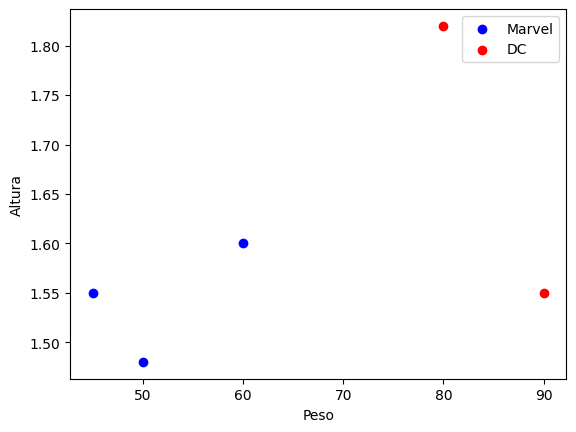

In [79]:
ax = plt.axes()
ax.scatter(df.loc[df.Comics=='marvel','Peso'],
           df.loc[df.Comics=='marvel','Altura'], c='blue',label='Marvel'
          )

ax.scatter(df.loc[df.Comics=='dc','Peso'],
           df.loc[df.Comics=='dc','Altura'], c='red',label='DC'
          )

plt.xlabel('Peso')
plt.ylabel('Altura')
ax.legend()

Si llegan datos de una sexta persona, pero no nos dicen su cómic favorito, ¿podemos adivinarlo de alguna forma?

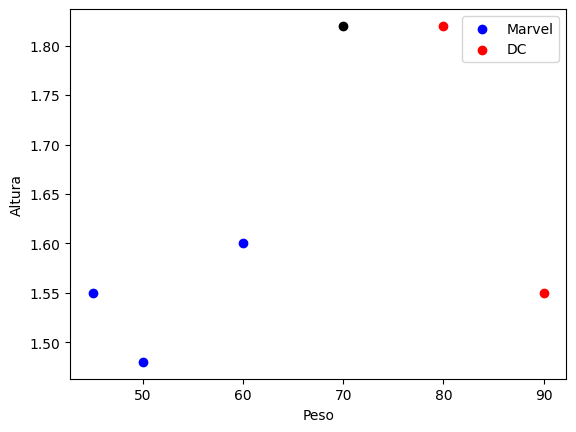

In [80]:
punto_nuevo = pd.DataFrame({'Peso':[70], 'Altura':[1.82]})

ax = plt.axes()
ax.scatter(df.loc[df.Comics=='marvel','Peso'],
           df.loc[df.Comics=='marvel','Altura'], c='blue',label='Marvel'
          )

ax.scatter(df.loc[df.Comics=='dc','Peso'],
           df.loc[df.Comics=='dc','Altura'], c='red',label='DC'
          )

plt.xlabel('Peso')
plt.ylabel('Altura')
ax.legend()

ax.scatter(punto_nuevo.Peso, punto_nuevo.Altura, c='k')


In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

X = df[['Peso','Altura']]
y = df['Comics']

knn.fit(X,y)

prediccion = knn.predict(punto_nuevo)
print(prediccion)

['dc']


In [82]:
knn.predict_proba(punto_nuevo)

array([[0.66666667, 0.33333333]])

In [83]:
import numpy as np
dist = np.linalg.norm(punto_nuevo-X.iloc[0])

In [84]:
X_ = X.copy()

In [85]:
X_["dist_nuevo_punto"]= X_.apply(lambda x:np.linalg.norm(punto_nuevo-x) , axis=1)

In [86]:
X_["comic"] = y

In [87]:
X_.sort_values("dist_nuevo_punto")

,Peso,Altura,dist_nuevo_punto,comic
1,80,1.82,10.000000,dc
4,60,1.60,10.002420,marvel
2,90,1.55,20.001822,dc
0,50,1.48,20.002890,marvel
3,45,1.55,25.001458,marvel


In [88]:
((punto_nuevo["Peso"].values[0] - X.iloc[:1]["Peso"].values[0])**2 + (punto_nuevo["Altura"].values[0] - X.iloc[:1]["Altura"].values[0])**2)**0.5

20.002889791227666

In [89]:
list_dist = []
for index, row in X.iterrows():
    print(index)
    #print(row)
    list_dist.append(((punto_nuevo["Peso"].values[0] - row["Peso"])**2 + (punto_nuevo["Altura"].values[0] - row["Altura"])**2)**0.5)

0
1
2
3
4


In [90]:
X_dist = X.copy()

In [91]:
X_dist['dist_euclidea'] = list_dist

In [92]:
X_dist['comic'] = y

In [93]:
X_dist

,Peso,Altura,dist_euclidea,comic
0,50,1.48,20.002890,marvel
1,80,1.82,10.000000,dc
2,90,1.55,20.001822,dc
3,45,1.55,25.001458,marvel
4,60,1.60,10.002420,marvel


In [94]:
X_dist.sort_values('dist_euclidea').head(3)["comic"].mode().values[0]

'dc'

In [95]:
from sklearn.preprocessing import StandardScaler
std =  StandardScaler()
X_std = std.fit_transform(X)


In [96]:
X_std = pd.DataFrame(X_std)

In [98]:
X_std

,0,1
0,-0.866025,-1.030508
1,0.866025,1.889265
2,1.443376,-0.429378
3,-1.154701,-0.429378
4,-0.288675,0.000000


In [99]:
X

,Peso,Altura
0,50,1.48
1,80,1.82
2,90,1.55
3,45,1.55
4,60,1.60


In [103]:
media_peso = X['Peso'].mean()
desviacion_peso = X['Peso'].std(ddof=0)
media_altura = X['Altura'].mean()
desviacion_altura = X['Altura'].std(ddof=0)
df_mio = pd.DataFrame()

In [106]:
df_mio['0'] = X['Peso'].apply(lambda x: (x - media_peso)/desviacion_peso)
df_mio['1'] = X['Altura'].apply(lambda x: (x - media_altura)/desviacion_altura)

In [107]:
df_mio

,0,1
0,-0.866025,-1.030508
1,0.866025,1.889265
2,1.443376,-0.429378
3,-1.154701,-0.429378
4,-0.288675,0.000000


In [ ]:
X_std.columns = X.columns

In [ ]:
punto_nuevo = std.transform(punto_nuevo)

In [ ]:
punto_nuevo = punto_nuevo[0]

In [ ]:
X_std["dist_nuevo_punto"]= X_std.apply(lambda x:np.linalg.norm(punto_nuevo-x) , axis=1)
X_std["comic"] = y

In [ ]:
X_std.sort_values("dist_nuevo_punto")

,Peso,Altura,dist_nuevo_punto,comic
1,0.866025,1.889265,0.577350,dc
4,-0.288675,0.000000,1.975514,marvel
2,1.443376,-0.429378,2.590259,dc
3,-1.154701,-0.429378,2.731197,marvel
0,-0.866025,-1.030508,3.139810,marvel


In [ ]:
data = {'Peso':[80, 45],
        'Altura':[1.82, 1.55],
        'Comics':['marvel','dc']
       }
df = pd.DataFrame(data)
df

,Peso,Altura,Comics
0,80,1.82,marvel
1,45,1.55,dc


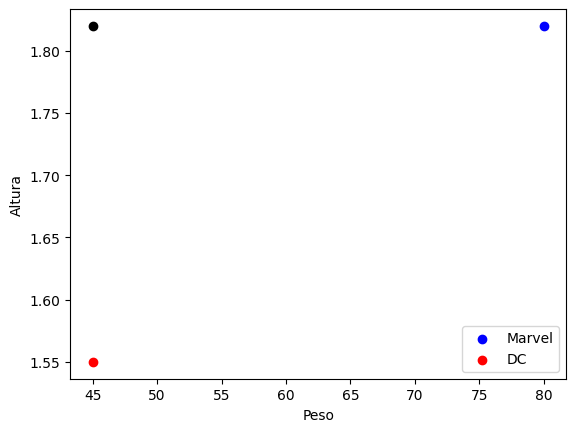

In [ ]:
punto_nuevo = pd.DataFrame({'Peso':[45], 'Altura':[1.82]})

ax = plt.axes()
ax.scatter(df.loc[df.Comics=='marvel','Peso'],
           df.loc[df.Comics=='marvel','Altura'], c='blue',label='Marvel'
          )

ax.scatter(df.loc[df.Comics=='dc','Peso'],
           df.loc[df.Comics=='dc','Altura'], c='red',label='DC'
          )

plt.xlabel('Peso')
plt.ylabel('Altura')
ax.legend()

ax.scatter(punto_nuevo.Peso, punto_nuevo.Altura, c='k')


In [ ]:
X = df[['Peso','Altura']]
X_ = X.copy()
X_["dist_nuevo_punto"]= X_.apply(lambda x:np.linalg.norm(punto_nuevo-x) , axis=1)


In [ ]:
X

,Peso,Altura
0,80,1.82
1,45,1.55


In [ ]:
from sklearn.preprocessing import StandardScaler
std =  StandardScaler()
X_std = std.fit_transform(X)


In [ ]:
X_std = pd.DataFrame(X_std)
X_std.columns = X.columns

In [ ]:
X_std

,Peso,Altura
0,1.0,1.0
1,-1.0,-1.0


In [ ]:
punto_nuevo = std.transform(punto_nuevo)
punto_nuevo = punto_nuevo[0]

In [ ]:
X_std["dist_nuevo_punto"]= X_std.apply(lambda x:np.linalg.norm(punto_nuevo-x) , axis=1)

In [ ]:
X_std

,Peso,Altura,dist_nuevo_punto
0,1.0,1.0,2.0
1,-1.0,-1.0,2.0
